In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import make_axes
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

import os, glob

from libraries.read_lib import read_pgm

%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

In [3]:
source = os.path.realpath('../data/samples/')
print(source)

/var/abs/local/camera/data/samples


In [4]:
filelist = glob.glob(source + '/test*.ppm')
filelist.sort()
headlist = []
imlist = []
for file in filelist[-4:]:
    print(file)
    h, im = read_pgm(file)
    headlist.append(h)
    imlist.append(im)

#for f in glob.glob(source+'test*'):
#    os.remove(f)

/var/abs/local/camera/data/samples/test-0000000000.ppm
/var/abs/local/camera/data/samples/test-0000000001.ppm
/var/abs/local/camera/data/samples/test-0000000002.ppm
/var/abs/local/camera/data/samples/test-0000000003.ppm


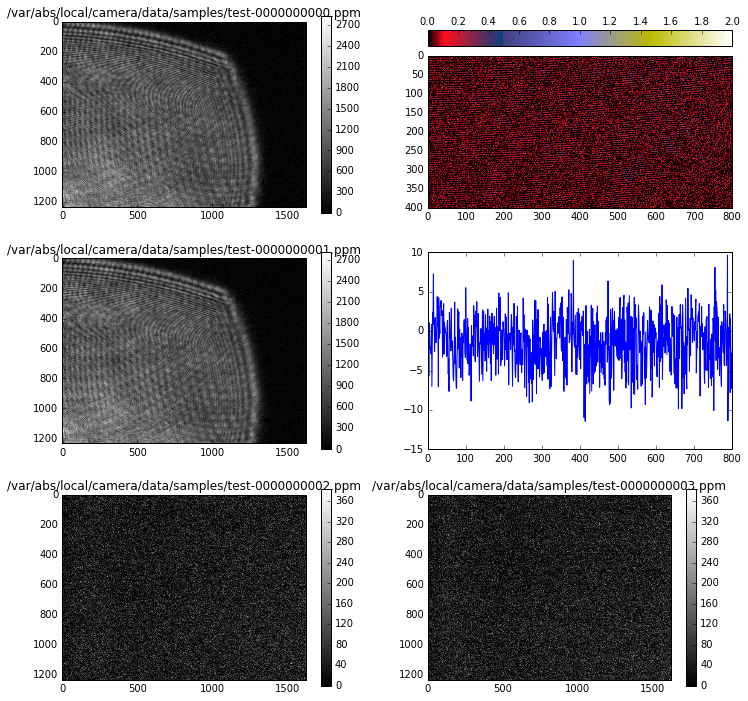

In [7]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (6*ncols,4*nrows))
gs = GridSpec(nrows, ncols, )
axes = [plt.subplot(gs[j,0]) for j in range(nrows)] + [plt.subplot(gs[-1,1])]

ax0 = plt.subplot(gs[0,1])
ax1 = plt.subplot(gs[1,1])

for j, (ax, im) in enumerate(zip(axes, imlist)):
    i = ax.imshow(im, cmap='gray',)
    cax, kw = make_axes(ax)
    ax.set_title(filelist[j])
    plt.colorbar(i, cax, **kw)
    
atoms, ref, b1, b2 = imlist
od_crop = (slice(800,1200), slice(200,1000))

#OD = -np.log((atoms[od_crop]-b1[od_crop])/(ref[od_crop]-b2[od_crop]+1))
OD = -np.log((atoms[od_crop]+1)/(ref[od_crop]+1))

i2 = ax0.imshow(OD, cmap='gist_stern', vmin=0, vmax=2)
cax, kw = make_axes(ax0, 'top')
plt.colorbar(i2, cax=cax, **kw)

ax1.plot(OD.sum(0))